# Sentiment Analysis on Twitter Data using NLP

In [1]:
# pandas dataframe library
import pandas as pd

In [2]:
#libraries for NLP toolkit
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords

In [3]:
# import spacy library
import spacy

In [4]:
# regex libraries
import re
import string

In [5]:
# libraries for sentiment analysis
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
# pandas plot library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# library for the custom wordcloud mask
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
# library to define the start and end time frame
import os
import time
from datetime import date

In [9]:
#Library to extract the data from twitter using snscrape module
import snscrape.modules.twitter as sntwitter
import itertools

In [10]:
#library to count the number of different tokens present in the tokenized_text
from collections import Counter
import seaborn as sns

# Extracting data from Twitter using snscrape module

In [49]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm.auto import tqdm


# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list, also I looked  data for 3 different hashtags
for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('#BezosInSpace since:2021-07-20 until:2021-07-22 lang:en').get_items())):
    if i>50000:
        break
    #print(dir(tweet))
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.place,tweet.user.location,tweet.retweetedTweet,tweet.retweetCount,tweet.quotedTweet])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['date_time', 'tweet_id', 'text', 'username', 'place','location','retweets','retweetcount','quoted_tweets',])

0it [00:00, ?it/s]

In [98]:
#read the data into notebook
data = pd.read_csv('total_hashtag.csv')

In [99]:
#number of rows and columns
data.shape

(24668, 11)

In [100]:
data.head()

,Unnamed: 0,Unnamed: 0.1,date_time,tweet_id,text,username,place,location,retweets,retweetcount,quoted_tweets
0,0,0,2021-07-21 23:57:51+00:00,1417997281366888449,#Bezos #Musk #elonhaveyouseenthis @elonmusk we...,goodchi_com,NaN,Las Palmas de Gran Canaria,NaN,0,https://twitter.com/HumanoidHistory/status/141...
1,1,1,2021-07-21 23:56:27+00:00,1417996926750924800,"Well, it's certainly more sexy &amp; powerful ...",3RhinestoneC,NaN,"Melbourne, Australia",NaN,0,NaN
2,2,2,2021-07-21 23:55:07+00:00,1417996593744293888,Fuck @JeffBezos and his Penis Mobile. If he @a...,mitziwear,"Place(fullName='New Orleans, LA', name='New Or...","New Orleans, LA",NaN,0,NaN
3,3,3,2021-07-21 23:48:15+00:00,1417994864185196544,People can’t afford to pay their rent and feed...,Boogeyman781,NaN,"New York, USA",NaN,0,NaN
4,4,4,2021-07-21 23:46:17+00:00,1417994368783368202,Absolutely. #TaxTheRich #Bezos #Billionaires h...,jp_activist,NaN,Earth,NaN,0,https://twitter.com/MoveToAmend/status/1417926...


In [101]:
#removing the columns
data.drop(['Unnamed: 0','Unnamed: 0.1','tweet_id','username','quoted_tweets','place','retweets','retweetcount'], axis = 1, inplace = True)

In [102]:
# to know the datatypes and the null values presents in the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24668 entries, 0 to 24667
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  24668 non-null  object
 1   text       24668 non-null  object
 2   location   19394 non-null  object
dtypes: object(3)
memory usage: 578.3+ KB


## Data cleaning

In [103]:
# function to remove the emojis present in the data
def remove_emoji(text):
    emoji_pattern = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return re.sub(emoji_pattern, "",text) 

In [104]:
# function to clean the data
def clean_data(text):
    text = re.sub(r'https?:\/\/\S+','',text) # to remove hyperlink from the data
    text = re.sub(r"@[A-Za-z0-9]+","",text) # to remove text present after @character
    text = re.sub(r"_[A-Za-z0-9]+","",text) #to remove text present after _character
    text = re.sub("[RT]","", text) #remove the letter RT
    text = re.sub('\[.*?\]',' ',text) # remove the special character
    text = re.sub('[%s]' % re.escape(string.punctuation),' ',text) # to remove the character #and others
    text = re.sub('\w*\d\w*',' ', text) # to remove numbers
    text = re.sub('[''""]',' ', text) # to remove ''"" characters
    text = re.sub('\n',' ', text) # to remove '\n'
    text = re.sub('[“”‍...…♂️✨☄️ ⬇️ ✊ ⏰  ❤️⚖️➡️]',' ', text) # to remove additional emojis which was unable to remove by the unicode
    return text

In [105]:
# applying the function to clean the data
data['text'] = data['text'].apply(clean_data)

In [106]:
# getting the text into lowercase
data['text'] = data['text'].str.lower()

In [107]:
#removes the emojis in the data
data['text'] = data['text'].apply(remove_emoji)

In [109]:
data.head(5)

,date_time,text,location
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Las Palmas de Gran Canaria
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,"Melbourne, Australia"
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,"New Orleans, LA"
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,"New York, USA"
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth


In [110]:
#this code helps to keep only the country 
data["country"] = data["location"].str.split().str[-1]

In [111]:
data.head()

,date_time,text,location,country
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Las Palmas de Gran Canaria,Canaria
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,"Melbourne, Australia",Australia
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,"New Orleans, LA",LA
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,"New York, USA",USA
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth,Earth


In [112]:
#drop the column which has both city and country name
data.drop(['location'],axis=1, inplace = True)

In [113]:
#fill the NaN with zero
data['country'] = data['country'].fillna(0)

In [114]:
# number of different countries tweeted about his journey
data['country'].value_counts()

0                5279
USA              1533
India             737
England           571
CA                544
                 ... 
Ji                  1
🇪🇺🌍                 1
Deez                1
Intergalactic       1
Classified          1
Name: country, Length: 3228, dtype: int64

In [175]:
round(1533 / data.shape[0] *100,1)

6.2

# Preprocessing the Data using NLP(Natural Language Processing)

## Tokenizing using nltk (natural language processing toolkit)

In [115]:
# tokenize the columns with nltk toolkit
data['tokenized_text'] = data['text'].apply(word_tokenize) 

In [116]:
data.head()

,date_time,text,country,tokenized_text
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Canaria,"[bezos, musk, elonhaveyouseenthis, well, all, ..."
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,Australia,"[well, it, s, certainly, more, sexy, amp, powe..."
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,LA,"[fuck, and, his, penis, mobile, if, he, ever, ..."
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,USA,"[people, can, ’, t, afford, to, pay, their, re..."
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth,"[absolutely, axheich, bezos, billionaires]"


In [117]:
# to count the tokens from the tokenized text
r = data['tokenized_text']
cou = Counter(j for k in r for j in k)
sorted_words = dict(sorted(cou.items(), key = lambda item: item[1],reverse=True))
sorted_words

{'blueorigin': 20133,
 'the': 14876,
 'to': 13243,
 'bezos': 12160,
 'space': 10848,
 'a': 9829,
 'and': 8007,
 'of': 6985,
 'i': 6046,
 'in': 5727,
 'is': 5675,
 'for': 5019,
 's': 4815,
 '’': 4618,
 'on': 4568,
 'jeffbezos': 4560,
 'it': 4425,
 'jeff': 3960,
 'he': 3689,
 'that': 3684,
 'you': 3494,
 'his': 3109,
 'this': 2731,
 't': 2455,
 'amazon': 2391,
 'like': 2285,
 'was': 2275,
 'flight': 2234,
 'into': 2182,
 'just': 2182,
 'rocket': 2169,
 'with': 2158,
 'we': 2099,
 'be': 2049,
 'all': 1954,
 'have': 1883,
 'are': 1835,
 'launch': 1813,
 'can': 1775,
 'so': 1755,
 'what': 1682,
 'newshepard': 1678,
 'not': 1647,
 'but': 1610,
 'about': 1545,
 'from': 1517,
 'go': 1402,
 'earth': 1360,
 'they': 1350,
 'at': 1325,
 'blue': 1323,
 'an': 1299,
 'as': 1274,
 'my': 1267,
 'up': 1247,
 'will': 1217,
 'if': 1210,
 'now': 1204,
 'first': 1201,
 'one': 1190,
 'people': 1172,
 'how': 1166,
 'origin': 1162,
 'bezosinspace': 1136,
 'amp': 1134,
 'has': 1114,
 'who': 1101,
 'me': 1091,
 

In [118]:
print(sorted_words['bezos'])

12160


## Removing stopwords using nltk

In [119]:
# import the default stopwords from nltk toolkit
from nltk.corpus import stopwords

In [120]:
#to use only the stopwaords from english language
stop_words = stopwords.words('english')

In [121]:
#count of the stopwords
len(stop_words) 

179

In [122]:
df = pd.DataFrame(stop_words)

In [123]:
# removing the keyword'not' from the stopwords
if 'not' in stop_words: stop_words.remove('not')

In [124]:
len(stop_words)

178

In [125]:
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])

In [126]:
data.head()

,date_time,text,country,tokenized_text
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Canaria,"[bezos, musk, elonhaveyouseenthis, well, brigh..."
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,Australia,"[well, certainly, sexy, amp, powerful, hey, gu..."
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,LA,"[fuck, penis, mobile, ever, anything, ’, strok..."
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,USA,"[people, ’, afford, pay, rent, feed, kids, bil..."
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth,"[absolutely, axheich, bezos, billionaires]"


In [127]:
r1 = data['tokenized_text']
cou = Counter(j for k in r1 for j in k)
sorted_words1 = dict(sorted(cou.items(), key = lambda item: item[1],reverse=True))
sorted_words1

{'blueorigin': 20133,
 'bezos': 12160,
 'space': 10848,
 '’': 4618,
 'jeffbezos': 4560,
 'jeff': 3960,
 'amazon': 2391,
 'like': 2285,
 'flight': 2234,
 'rocket': 2169,
 'launch': 1813,
 'newshepard': 1678,
 'not': 1647,
 'go': 1402,
 'earth': 1360,
 'blue': 1323,
 'first': 1201,
 'one': 1190,
 'people': 1172,
 'origin': 1162,
 'bezosinspace': 1136,
 'amp': 1134,
 'back': 1080,
 'wally': 1050,
 'new': 1029,
 'today': 1021,
 'going': 981,
 'billionaire': 915,
 'get': 912,
 'money': 853,
 'billionaires': 842,
 'branson': 837,
 'hat': 820,
 'penis': 819,
 'funk': 804,
 'see': 787,
 'minutes': 783,
 'would': 779,
 'crew': 779,
 'live': 762,
 'world': 751,
 'looks': 745,
 'giant': 744,
 'congratulations': 741,
 'day': 725,
 'time': 705,
 'man': 687,
 'wallyfunk': 656,
 'dick': 654,
 'spaceflight': 650,
 'could': 643,
 'watching': 630,
 'think': 621,
 'watch': 606,
 'spacex': 602,
 'look': 581,
 'know': 580,
 'us': 554,
 'capsule': 553,
 'really': 544,
 'trip': 536,
 'virgingalactic': 531,
 

## Tokenization using Spacy

Spacy is highly optimised and does the multiprocessing for you. As a result, I think your best bet is to take the data out of the Dataframe and pass it to the Spacy pipeline as a list rather than trying to use .apply directly. You then need to the collate the results of the parse, and put this back into the Dataframe.

In [128]:
tokens = []
nlp = spacy.load("en_core_web_sm")
for doc in nlp.pipe(data['text'].astype('unicode').values):
    if doc.has_annotation:
        tokens.append([n.text for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
data['tokenized_text_spacy'] = tokens

In [129]:
data.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Canaria,"[bezos, musk, elonhaveyouseenthis, well, brigh...","[ , bezos, , musk, , elonhaveyouseenthis, ,..."
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,Australia,"[well, certainly, sexy, amp, powerful, hey, gu...","[well, , it, s, certainly, more, sexy, , amp..."
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,LA,"[fuck, penis, mobile, ever, anything, ’, strok...","[fuck, , and, his, penis, mobile, , if, he, ..."
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,USA,"[people, ’, afford, pay, rent, feed, kids, bil...","[people, ca, n’t, afford, to, pay, their, rent..."
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth,"[absolutely, axheich, bezos, billionaires]","[absolutely, , axheich, , bezos, , billion..."


## Removing stop words using Spacy

Note that nlp by default runs the entire SpaCy pipeline, which includes part-of-speech tagging, parsing and named entity recognition. You can significantly speed up your code by using nlp.tokenizer(x) instead of nlp(x), or by disabling parts of the pipeline when you load the model. E.g. nlp = spacy.load('en', parser=False, entity=False). The SpaCy library in Python is yet another extremely useful language for natural language processing in Python

In [130]:
sp = spacy.load('en_core_web_sm')

all_stopwords = sp.Defaults.stop_words

In [131]:
len(all_stopwords)

325

In [132]:
if 'not'in all_stopwords:all_stopwords.remove('not')

In [133]:
len(all_stopwords)

325

In [134]:
data['tokenized_text_spacy'] = data['tokenized_text_spacy'].apply(lambda x: [item for item in x if item not in all_stopwords])

In [135]:
data.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Canaria,"[bezos, musk, elonhaveyouseenthis, well, brigh...","[ , bezos, , musk, , elonhaveyouseenthis, ,..."
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,Australia,"[well, certainly, sexy, amp, powerful, hey, gu...","[ , s, certainly, sexy, , amp, , powerful, h..."
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,LA,"[fuck, penis, mobile, ever, anything, ’, strok...","[fuck, , penis, mobile, , , stroke, ego, wa..."
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,USA,"[people, ’, afford, pay, rent, feed, kids, bil...","[people, afford, pay, rent, feed, kids, billio..."
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth,"[absolutely, axheich, bezos, billionaires]","[absolutely, , axheich, , bezos, , billion..."


# Sentiment_Analysis using nltk

In [136]:
# function to get the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [137]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [138]:
#converting the list into string to calculate the sentiment
data['tokenized_text'] = data['tokenized_text'].apply(', '.join)

In [139]:
data.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Canaria,"bezos, musk, elonhaveyouseenthis, well, bright...","[ , bezos, , musk, , elonhaveyouseenthis, ,..."
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,Australia,"well, certainly, sexy, amp, powerful, hey, guy...","[ , s, certainly, sexy, , amp, , powerful, h..."
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,LA,"fuck, penis, mobile, ever, anything, ’, stroke...","[fuck, , penis, mobile, , , stroke, ego, wa..."
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,USA,"people, ’, afford, pay, rent, feed, kids, bill...","[people, afford, pay, rent, feed, kids, billio..."
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth,"absolutely, axheich, bezos, billionaires","[absolutely, , axheich, , bezos, , billion..."


In [140]:
# get the polarity and create a new column
data['polarity'] = data['tokenized_text'].apply(get_polarity)

In [141]:
# get the subjectivity and create a new column
data['subjectivity'] = data['tokenized_text'].apply(get_subjectivity)

In [142]:
# creating a function to compute the negative, positive and neutral analysis
def get_analysis(pol):
    if pol>0:
        return 'positive'
    elif pol<0:
        return 'negative'
    else:
        return 'neutral'
data['analysis'] = data['polarity'].apply(get_analysis)

In [143]:
data.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy,polarity,subjectivity,analysis
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Canaria,"bezos, musk, elonhaveyouseenthis, well, bright...","[ , bezos, , musk, , elonhaveyouseenthis, ,...",0.500,0.50,positive
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,Australia,"well, certainly, sexy, amp, powerful, hey, guy...","[ , s, certainly, sexy, , amp, , powerful, h...",0.400,1.00,positive
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,LA,"fuck, penis, mobile, ever, anything, ’, stroke...","[fuck, , penis, mobile, , , stroke, ego, wa...",-0.400,0.60,negative
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,USA,"people, ’, afford, pay, rent, feed, kids, bill...","[people, afford, pay, rent, feed, kids, billio...",0.375,0.75,positive
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth,"absolutely, axheich, bezos, billionaires","[absolutely, , axheich, , bezos, , billion...",0.200,0.90,positive


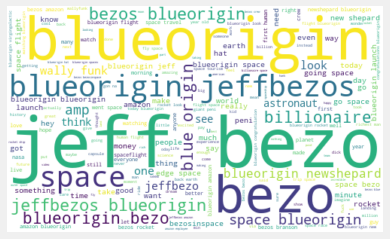

In [144]:
# word cloud create
allwords = ' '.join([twee for twee in data['tokenized_text']])
wordcloud = WordCloud(width = 500, height = 300, background_color = 'white',random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

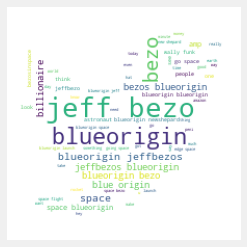

In [145]:
allwords = ' '.join([twee for twee in data['tokenized_text']])
twitter_mask = np.array(Image.open('twitter.jpg'))
wordcloud = WordCloud(width = 500, height = 300,background_color = 'white',mask = twitter_mask).generate(allwords)
plt.imshow(wordcloud,)
plt.axis('off')
plt.show()

In [146]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

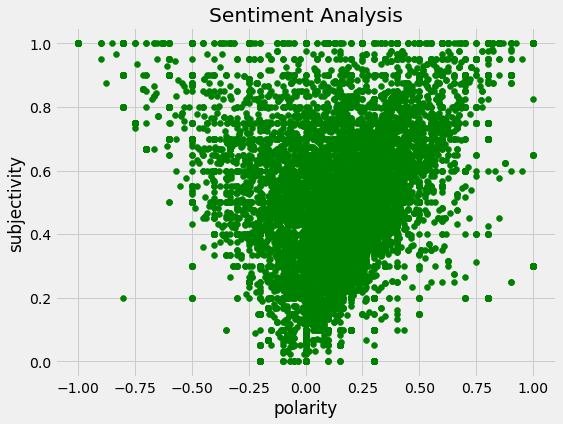

In [60]:
# plot the polarity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0,data.shape[0]):
    plt.scatter(data['polarity'][i],data['subjectivity'][i], color = 'green')
plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [147]:
# check the list of positive tweets
pos_tweets = data[data.analysis == 'positive']
pos_tweets = pos_tweets['tokenized_text']
round(pos_tweets.shape[0] / data.shape[0] *100,1)

46.0

In [148]:
len(pos_tweets)

11343

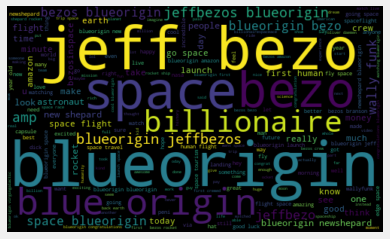

In [149]:
allwords = ' '.join([twee for twee in pos_tweets])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [150]:
# check the list of negative tweets
neg_tweets = data[data.analysis == 'negative']
neg_tweets = neg_tweets['tokenized_text']
round(neg_tweets.shape[0] / data.shape[0] *100,1)

14.4

In [151]:
len(neg_tweets)

3553

In [152]:
# check the list of neutral tweets
neu_tweets = data[data.analysis == 'neutral']
neu_tweets = neu_tweets['tokenized_text']
round(neu_tweets.shape[0] / data.shape[0] *100,1)

39.6

In [153]:
len(neu_tweets)

9772

<AxesSubplot:title={'center':'Sentiment_Analysis'}, xlabel='sentiment', ylabel='count'>

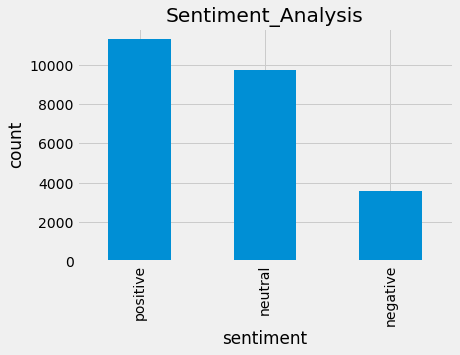

In [154]:
# plot the bar chart
plt.title('Sentiment_Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
data['analysis'].value_counts().plot(kind = 'bar')

# Sentiment Analysis using spacy

In [155]:
#converting the list into string to calculate the sentiment
data['tokenized_text_spacy'] = data['tokenized_text_spacy'].apply(', '.join)

In [156]:
data.shape

(24668, 8)

In [157]:
# get the polarity and create a new column
data['polarity_spacy'] = data['tokenized_text_spacy'].apply(get_polarity)

In [158]:
# get the subjectivity and create a new column
data['subjectivity_spacy'] = data['tokenized_text_spacy'].apply(get_subjectivity)

In [159]:
# creating a function to compute the negative, positive and neutral analysis
def get_analysis(pol):
    if pol>0:
        return 'positive'
    elif pol<0:
        return 'negative'
    else:
        return 'neutral'
data['analysis_spacy'] = data['polarity_spacy'].apply(get_analysis)

In [160]:
data.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy,polarity,subjectivity,analysis,polarity_spacy,subjectivity_spacy,analysis_spacy
0,2021-07-21 23:57:51+00:00,bezos musk elonhaveyouseenthis well all of...,Canaria,"bezos, musk, elonhaveyouseenthis, well, bright...",", bezos, , musk, , elonhaveyouseenthis, , ...",0.500,0.50,positive,0.500,0.50,positive
1,2021-07-21 23:56:27+00:00,well it s certainly more sexy amp powerful ...,Australia,"well, certainly, sexy, amp, powerful, hey, guy...",", s, certainly, sexy, , amp, , powerful, he...",0.400,1.00,positive,0.400,1.00,positive
2,2021-07-21 23:55:07+00:00,fuck and his penis mobile if he ever did an...,LA,"fuck, penis, mobile, ever, anything, ’, stroke...","fuck, , penis, mobile, , , stroke, ego, wal...",-0.400,0.60,negative,-0.400,0.60,negative
3,2021-07-21 23:48:15+00:00,people can’t afford to pay their rent and feed...,USA,"people, ’, afford, pay, rent, feed, kids, bill...","people, afford, pay, rent, feed, kids, billion...",0.375,0.75,positive,0.375,0.75,positive
4,2021-07-21 23:46:17+00:00,absolutely axheich bezos billionaires,Earth,"absolutely, axheich, bezos, billionaires","absolutely, , axheich, , bezos, , billiona...",0.200,0.90,positive,0.200,0.90,positive


In [161]:
data['country'].value_counts()

0                5279
USA              1533
India             737
England           571
CA                544
                 ... 
Ji                  1
🇪🇺🌍                 1
Deez                1
Intergalactic       1
Classified          1
Name: country, Length: 3228, dtype: int64

In [162]:
round(5279 / data.shape[0] *100,1)

21.4

In [163]:
# check the list of positive tweets
zero = data[data.country == 'USA']
zero = zero['text']
round(zero.shape[0] / data.shape[0] *100,1)

6.2

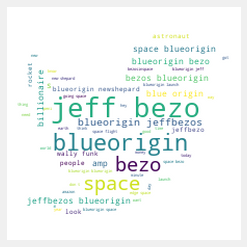

In [165]:
allwords = ' '.join([twee for twee in data['tokenized_text_spacy']])
twitter_mask = np.array(Image.open('twitter.jpg'))
wordcloud = WordCloud(background_color = 'white',mask = twitter_mask).generate(allwords)
plt.imshow(wordcloud,interpolation = 'blackman')
plt.axis('off')
plt.show()

In [166]:
# check the list of positive tweets
pos_tweets = data[data.analysis_spacy == 'positive']
pos_tweets = pos_tweets['tokenized_text_spacy']
round(pos_tweets.shape[0] / data.shape[0] *100,1)

41.8

In [167]:
len(pos_tweets)

10313

In [168]:
# check the list of negative tweets
neg_tweets = data[data.analysis_spacy == 'negative']
neg_tweets = neg_tweets['tokenized_text_spacy']
round(neg_tweets.shape[0] / data.shape[0] *100,1)

14.1

In [169]:
len(neg_tweets)

3470

In [170]:
# check the list of neutral tweets
neu_tweets = data[data.analysis_spacy == 'neutral']
neu_tweets = neu_tweets['tokenized_text_spacy']
round(neu_tweets.shape[0] / data.shape[0] *100,1)

44.1

In [171]:
len(neu_tweets)

10885

<AxesSubplot:title={'center':'Sentiment_Analysis'}, xlabel='sentiment', ylabel='count'>

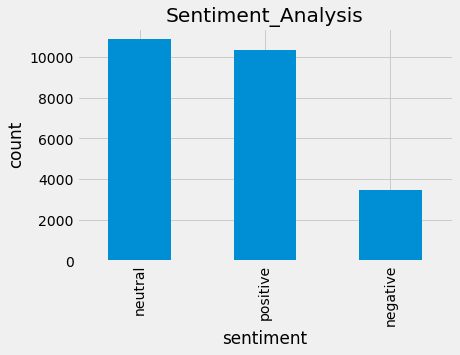

In [172]:
# plot the bar chart
plt.title('Sentiment_Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
data['analysis_spacy'].value_counts().plot(kind = 'bar')